# Regression with ML, tabular data and tree based

**Author**: Jonathan TRICARD

**Summary**: using a dataset propose by scikit-learn, we build an Random Forest model to predict the price of a house. Then we try to use intelligibility on the model with the the conditions tabular data and tree based.

**ExplainML**: create a HTML report to have visualizations to explain how machine learning model works.

## Import libraries

In [4]:
import pandas as pd 

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics  import mean_absolute_error, mean_squared_error, r2_score

from readml.logger import ROOT_DIR
from readml.explainers.ml.explain_ml import ExplainML 

## Import data

In [5]:
def create_and_split_dataframe():
    dict_data = fetch_california_housing()
    X = pd.DataFrame(dict_data["data"], columns=dict_data["feature_names"])
    y = pd.DataFrame(dict_data["target"], columns=dict_data["target_names"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    df_train = X_train.copy()
    df_train[y_train.columns.values[0]] = y_train
    df_test = X_test.copy()
    df_test[y_test.columns.values[0]] = y_test
    return X_train, X_test, y_train, y_test, df_train, df_test

In [6]:
X_train, X_test, y_train, y_test, df_train, df_test = create_and_split_dataframe() 

## Train model

In [7]:
rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

/home/sihihi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=2, random_state=42)

In [8]:
y_pred = rf.predict(X_test) 

In [9]:
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print("MAE : ", mae_rf)
print("MSE : ", mse_rf)
print("R2 : ", r2_rf)

MAE :  0.6455534379282315
MSE :  0.7189777402806168
R2 :  0.45222417509349133


## Use intelligibility from readml

 **WARNINGS**: Take care of change de config_local.cfg to adapt it to the use case, you may need to re run ```pip install -e .``` after the change in the configuration.

In [12]:
model_explain = rf # The model you use
task = "regression" # here we try to solve a regression problem
tree_based_model = True # if you use a tree based model
features_name = list(X_train.columns) # all the features without de target column
features_to_interpret = features_name # the features on which you want to make intelligibility
target_col = list(y_train.columns)[0] # the tagets columns
out_path = "../outputs/notebooks/" # the path where you want to save the report
os.makedirs(os.path.join(ROOT_DIR, out_path))

In [13]:
exp = ExplainML(
        model=model_explain,
        task_name=task, 
        tree_based_model=tree_based_model,
        features_name=features_name,
        features_to_interpret=features_to_interpret,
        target_col=target_col,
        out_path=out_path,
    )

  2022-04-06 11:44:30,287 --- readml --- INFO --- Directory created ./outputs/ 
  2022-04-06 11:44:30,305 --- readml --- INFO --- Directory created ./outputs/local_interpretation 
  2022-04-06 11:44:30,320 --- readml --- INFO --- Directory created ./outputs/global_interpretation 


In [14]:
exp.global_ale(df_train) # you need to use the dataframe with features and target into 

  2022-04-06 11:44:32,380 --- readml --- INFO --- Computing ALE
  2022-04-06 11:44:33,412 --- readml --- INFO --- Saving ALE plots in ./outputs/global_interpretation


In [15]:
exp.global_pdp_ice(df_train) 

  2022-04-06 11:44:33,610 --- readml --- INFO --- Computing PDP & ice
  2022-04-06 11:44:38,458 --- readml --- INFO --- Saving PD plots in ./outputs/global_interpretation
  2022-04-06 11:44:38,620 --- readml --- INFO --- Saving ICE plots in ./outputs/global_interpretation


  2022-04-06 11:44:38,789 --- readml --- INFO --- Computing SHAP
  2022-04-06 11:44:38,791 --- readml --- INFO --- You are using a tree based model, if it's not the case, please set tree_based_model to False in config/config_{type_env}.cfg
  2022-04-06 11:44:39,237 --- readml --- INFO --- Saving SHAP plots in ./outputs/global_interpretation


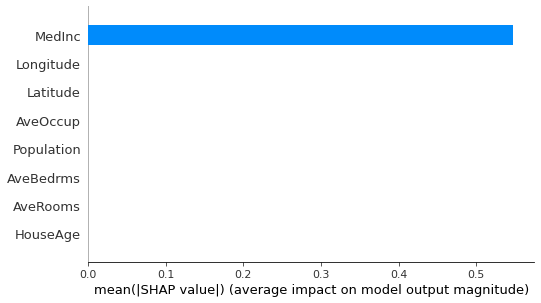

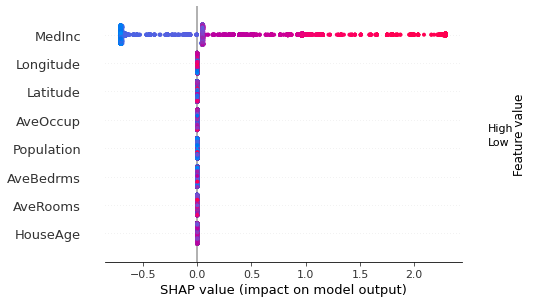

In [16]:
exp.global_shap(df_train) 

In [17]:
exp.local_shap(df_test.head()) # be careful it will produce one output by rows  

  2022-04-06 11:44:39,963 --- readml --- INFO --- You are using a tree based model, if it's not the case, please set tree_based_model to False in config/config_{type_env}.cfg
  2022-04-06 11:44:39,971 --- readml --- INFO --- Computing SHAP individual plots for 1th observation
  2022-04-06 11:44:39,975 --- readml --- INFO --- Computing SHAP individual plots for 2th observation
  2022-04-06 11:44:39,979 --- readml --- INFO --- Computing SHAP individual plots for 3th observation
  2022-04-06 11:44:39,981 --- readml --- INFO --- Computing SHAP individual plots for 4th observation
  2022-04-06 11:44:39,984 --- readml --- INFO --- Computing SHAP individual plots for 5th observation
  2022-04-06 11:44:39,986 --- readml --- INFO --- Saving SHAP individual plots for 1th observation in {self.out_path_local}
  2022-04-06 11:44:40,003 --- readml --- INFO --- Saving SHAP individual plots for 2th observation in {self.out_path_local}
  2022-04-06 11:44:40,018 --- readml --- INFO --- Saving SHAP indiv